In [33]:
import numpy as np
import pandas as pd

from sklearn.neighbors import kneighbors_graph as kg
from sklearn.datasets import make_circles, make_moons, load_sample_image 
from sklearn.cluster import KMeans, SpectralClustering, OPTICS
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.sparse import csr_matrix

import networkx as nx

import warnings
warnings.filterwarnings('ignore')

## Spectral clustering method:

In [14]:
class EigenClust:
    def __init__(self, data, nn=5, num_clusters=3):
        A = kg(data, nn).toarray()
        diag = A.sum(axis=1)
        D = np.diag(diag)
        self.laplacian = D - A
        self.nclust = num_clusters
        
    def fit(self):
        vals, vecs = np.linalg.eig(self.laplacian)
        vals = vals.astype(float)
        vecs = vecs.astype(float)
        ind = np.argsort(vals)[:self.nclust]
        data = vecs[:, ind]
        kmeans = KMeans(n_clusters=self.nclust, random_state=0).fit(data)
        self.labels = kmeans.labels_
        return kmeans.labels_
    
    def draw(self, data):
        plt.scatter(data[:, 0], data[:, 1], c=self.labels)

## MISC:

In [70]:
def rand_around_centers(centers, number=50):
    result = []
    labels = []
    for c, j in zip(centers, range(centers.shape[0])):
        result.append(c)
        labels.append(j)
        for i in range(number):
            result.append(
                [c[0] + 0.4*np.random.rand(), c[1] + 0.4*np.random.rand()]
            )
            labels.append(j)
    return np.array(result), np.array(labels)       

def draw2d(data, c=None):
    plt.scatter(data[:, 0], data[:, 1], c=c)
    
def cut(A, set_nodes):
    summ = 0
    for i in set_nodes:
        for j in range(A[i, :].size):
            if A[i, j] > 0.0:
                if j not in set_nodes:
                    summ += 1
                    
    return summ 

def show_graph_with_labels(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, with_labels=True)
    plt.show()

## Experiments:

### My data:

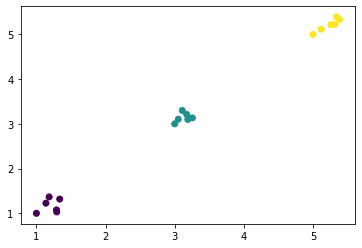

In [71]:
centers = np.array(
    [
        [1,1],
        [3,3],
        [5,5],
    ]
)
data, labels_data = rand_around_centers(centers, number=5)
draw2d(data, c=labels_data)

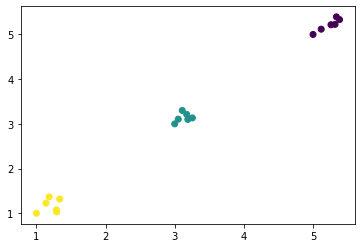

In [80]:
model = EigenClust(data, num_clusters=3)
model.fit()
model.draw(data)

### Circles data:

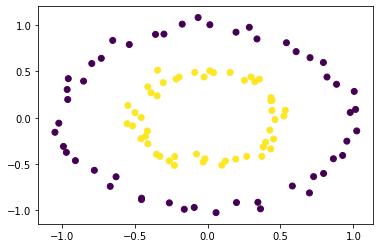

In [107]:
circles, labels_circles = make_circles(100, noise=0.04, factor=0.5)
draw2d(circles, labels_circles)

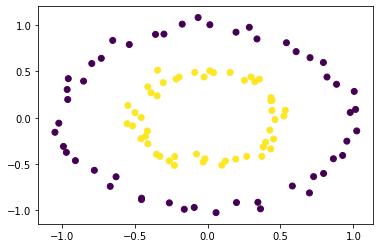

In [108]:
model = EigenClust(circles, nn=4, num_clusters=2)
model.fit()
model.draw(circles)

### Moons data:

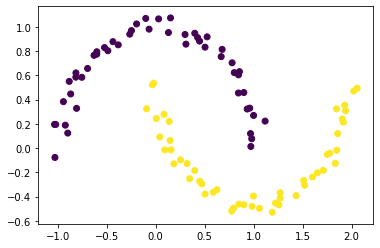

In [47]:
moons, labels_moon = make_moons(n_samples=100, noise=0.05, random_state=3)
draw2d(moons, labels_moon)

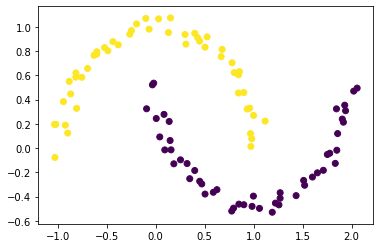

In [109]:
model = EigenClust(moons, nn=6, num_clusters=2)
model.fit()
model.draw(moons)

## Sklearn baseline algorithms:

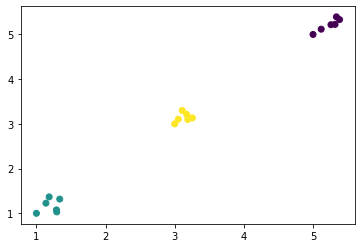

In [113]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
draw2d(data, kmeans.labels_)

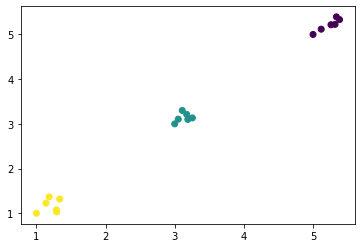

In [114]:
clustering = SpectralClustering(
    n_clusters=3,
    assign_labels="discretize",
    random_state=0,
).fit(data)
draw2d(data, clustering.labels_)

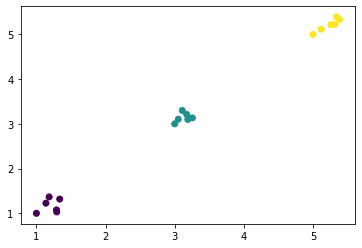

In [116]:
optics = OPTICS(min_samples=3).fit(data)
draw2d(data, optics.labels_)